In [1]:
import pandas as pd
import seaborn as sns

# Part 1 Cleaning and Merging data with Pandas

In [2]:
#A: Import all three datasets to your notebook as 3 different data frames

#Importing the first sheet
county = pd.read_excel('holiday_homes_sample.xlsx', sheet_name='county')
county.head(3)

,county_code,county_name
0,1,Østfold
1,2,Akershus
2,3,Oslo


In [3]:
#Importing the second sheet
house_des = pd.read_excel('holiday_homes_sample.xlsx', sheet_name='house_descriptive')
house_des.head(3)

,house_id,price,county_municipality,location,lat,lng
0,45640517,3800000,5_Nord-Fron,Mountain,61.515,9.373
1,46899373,3100000,50_Other,Sea,63.634,10.771
2,52166954,690000,15_Other,Other,62.415,6.267


In [4]:
#Importing the third sheet
house_data = pd.read_excel('holiday_homes_sample.xlsx', sheet_name='house_data')
house_data.head(3)

,house_id,sqm,built,bedrooms,view,water,dist_ski_km,dist_sea_km,dist_to_road_m,elevation,neighbours_100m,neighbours_1000m,nearest_neighbour,pop_1km,pop_5km
0,124685047,178,1700,7,1,0,44.06,0.08,51.69,4,2,151,21,25,5316
1,121898650,38,1740,1,1,0,14.05,27.14,32.18,661,2,1,25,0,52
2,120939864,140,1830,4,0,0,6.63,0.05,41.46,48,9,256,42,170,36769


In [5]:
#B: Spliting the variable into two columns

county_m = house_des['county_municipality'].str.split("_",expand=True)

#Storing County Code as integer and municipality as a string
house_des["county_code"]=county_m[0].astype(int)
house_des["municipality"]=county_m[1].astype(str)

county_m.head(2)

,0,1
0,5,Nord-Fron
1,50,Other


In [6]:
#C Merging house_descriptive and county data set 
merge_1 = pd.merge(house_des,county, how='inner', on ='county_code')
merge_1.head(3)

,house_id,price,county_municipality,location,lat,lng,county_code,municipality,county_name
0,45640517,3800000,5_Nord-Fron,Mountain,61.515,9.373,5,Nord-Fron,Oppland
1,61701074,3550000,5_Nord-Fron,Mountain,61.525,9.398,5,Nord-Fron,Oppland
2,64961255,3250000,5_Nord-Fron,Mountain,61.721,9.719,5,Nord-Fron,Oppland


In [7]:
#D Merge, merge_1 and house_data dataset 
merge_2 = pd.merge(merge_1,house_data, how = 'inner', on ='house_id')
merge_2.head(3)

,house_id,price,county_municipality,location,lat,lng,county_code,municipality,county_name,sqm,...,water,dist_ski_km,dist_sea_km,dist_to_road_m,elevation,neighbours_100m,neighbours_1000m,nearest_neighbour,pop_1km,pop_5km
0,45640517,3800000,5_Nord-Fron,Mountain,61.515,9.373,5,Nord-Fron,Oppland,97,...,1,21.03,94.09,20.95,966,2,121,96,29,305
1,61701074,3550000,5_Nord-Fron,Mountain,61.525,9.398,5,Nord-Fron,Oppland,84,...,1,19.83,95.75,58.24,894,5,175,56,149,334
2,64961255,3250000,5_Nord-Fron,Mountain,61.721,9.719,5,Nord-Fron,Oppland,99,...,1,24.82,115.42,53.14,942,8,110,32,4,66


# Part 2 Analysing holiday house prices with Pandas

In [8]:
#A: Create Data Frame that shows the average price and the number of houses by each county_name

#Step 1: Creating sub_set from the merge_2 data set
sub_dataset = merge_2[['county_name', 'price']]

#Step 2: Grouping the county_name by calculating the mean of the house prices from that county
df_county = sub_dataset.groupby('county_name').mean()

#Step 3: Grouping the county_name by counting how many similar county names are there
dx_county = sub_dataset.groupby('county_name').count()

#Step 4: merging df_county and dx_county to put the result from each in one data frame 
df2_county = pd.merge(df_county,dx_county,how='inner',on='county_name')

#naming the columns of the new data frame
df2_county.columns = ['Average Price','Number of houses']

df2_county

,Average Price,Number of houses
county_name,,
Akershus,3.869000e+06,10
Aust-Agder,2.801389e+06,36
Buskerud,3.906707e+06,82
Finnmark Finnmárku,1.104444e+06,9
Hedmark,1.954212e+06,51
Hordaland,2.575000e+06,42
Møre og Romsdal,2.275595e+06,42
Nordland,1.252467e+06,39
Oppland,2.948750e+06,78


Continuation A.

- Which county has the highest average holiday house price? Buskerud

- How many are observed for this county? 82



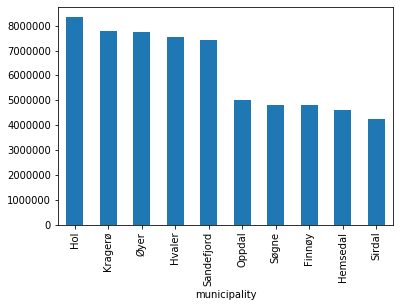

In [9]:
#B Create a plot showing the top 10 municipalities of average holiday house price. What plot type did you choose and why?

#Step 1: Creating a sub_dataset again but this time with municipality and price
sub_dataset2 = merge_2[['municipality','price']]

#Step 2: Calculating the average price per municipality
df_municipality = sub_dataset2.groupby('municipality').mean()
df_municipality.columns = ['Average Price']

#Step 3: Bar plotting 
top_10_municipality = df_municipality['Average Price'].sort_values(ascending = False).head(10).plot.bar()


Comment: We chose bar plot since it best represent the order of the top 10 municipalities in terms of the average holiday house price.

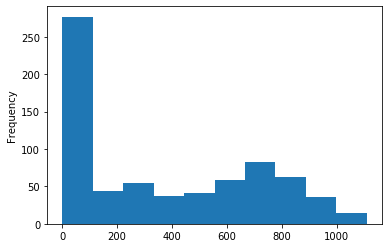

In [10]:
#C Create a plot of the elevation of the houses in the dataset. Comment on the frequency of different elevations. What plot type did you choose and why?

#Step 1: Getting the subset of the dataset which is "Elevation"
plot_elevation = merge_2['elevation']

#Step 2: Plotting the histogram
plot_elevation.plot.hist()

Comment: We chose the Histogram because we think that it's the best representation of how many houses have an elevation between the given intervals. From the histogram above we can say that most of the houses in the data set have an elevation between 0 and 100, and there are few houses that have an elevation more than 1000.

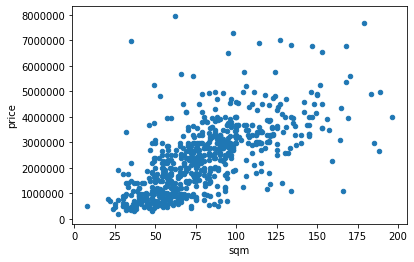

In [11]:
#D Create a scatter plot with price on the vertical axis and square meter on the horizontal axis

#Step 1: Creating a new dataset which focuses on those houses, which have a lower price than 8 mill. and a size less than 200 squaremeter 
new_set_data = (merge_2['price'] <= 8000000) & (merge_2['sqm'] <= 200)

sub_new = merge_2[new_set_data]

#Plotting a Scatter plot with the square meter on x-axis and the price on y-axis
sub_new.plot.scatter(y='price',x='sqm')


Comment: From the diagram, it can be said that price and square meter has a positive correlation. 

C:\Users\power\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


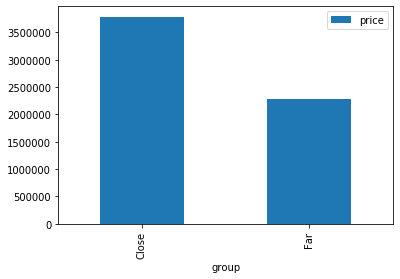

In [12]:
#E Create the bar plot showing the average price of holiday houses close to a ski resort and far from ski resort

#Step 1: Creating sub data set with price, and distance to ski resort
sub_dataset3 = merge_2[['price','dist_ski_km']]

#Step 2: Initialisting an empty list
group = []

#Step 3: Loop through the sub_dataset3
for i in range(len(sub_dataset3)):
    #Step 4: Setting conditions if distance to ski resort is less than to 10 then step4(A) will execute 
    #else step4(B)
    if sub_dataset3['dist_ski_km'].iloc[i] < 10:
        #Step4(A): appending 'Close' to the empty list in Step 2
        group.append('Close')
    else:
        #Step4(B): appending 'Far' to the empty list in Step 2
        group.append('Far')  

#Step 5: adding a column to our sub_dataset 3 called group which contained all the values from
#our empty list in step 2
sub_dataset3['group'] = group

#Plot the data set
sub_dataset3[['group','price']].groupby('group').mean().plot.bar()



# Part 3 Multivariate Plots with Seaborn

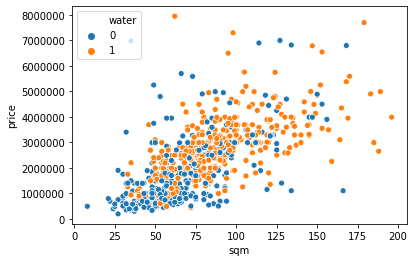

In [13]:
#A Create a similar scatter plot as in 2(d) but this time using the Seaborn package. 

#Simalar as 2(D) but having hue='water' as a parameter which shows how many houses 
#in the sub_new data set have water .
sns.scatterplot(y='price', x='sqm',hue='water',data=sub_new)

Comment: from the scatter plot diagram above, it can be concluded that there is a positive correlation between price and squaremeters. Moreover, houses that have a size from 65sqm to 150sqm have water installed in them. 

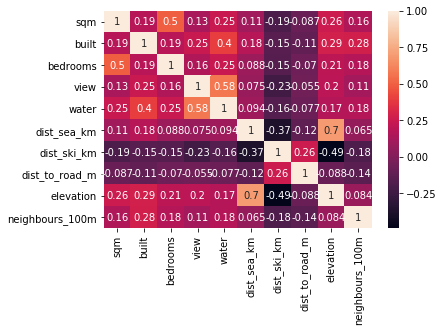

In [14]:
#B Create a correlation heat map with square meters, built, bedrooms, view, water, distance to ski resort, distance to sea, distance to road, elevation, and the number of neighbours within 100 meters

#Step 1: Getting a hold of all the features of the houses needed to find the correlation between them, from the merge_2 dataset
correlation = merge_2[['sqm', 'built', 'bedrooms', 'view','water','dist_sea_km', 'dist_ski_km', 'dist_to_road_m','elevation', 'neighbours_100m']].corr() 

#Step 2: Creting a Heatmap, with all the values inside the box 
sns.heatmap(correlation,annot=True)


Comment: From the heatmap it can be conclude that distance to sea and elevation have the largest positive correlation, meaning the houses that are near to the sea have high elevation. On the other hand, neighbours within 100m and distance to the road have the largest negative correlation, meaning that the number of neighbours within 100 meters does not have a connection on the distance of the house from the road. 

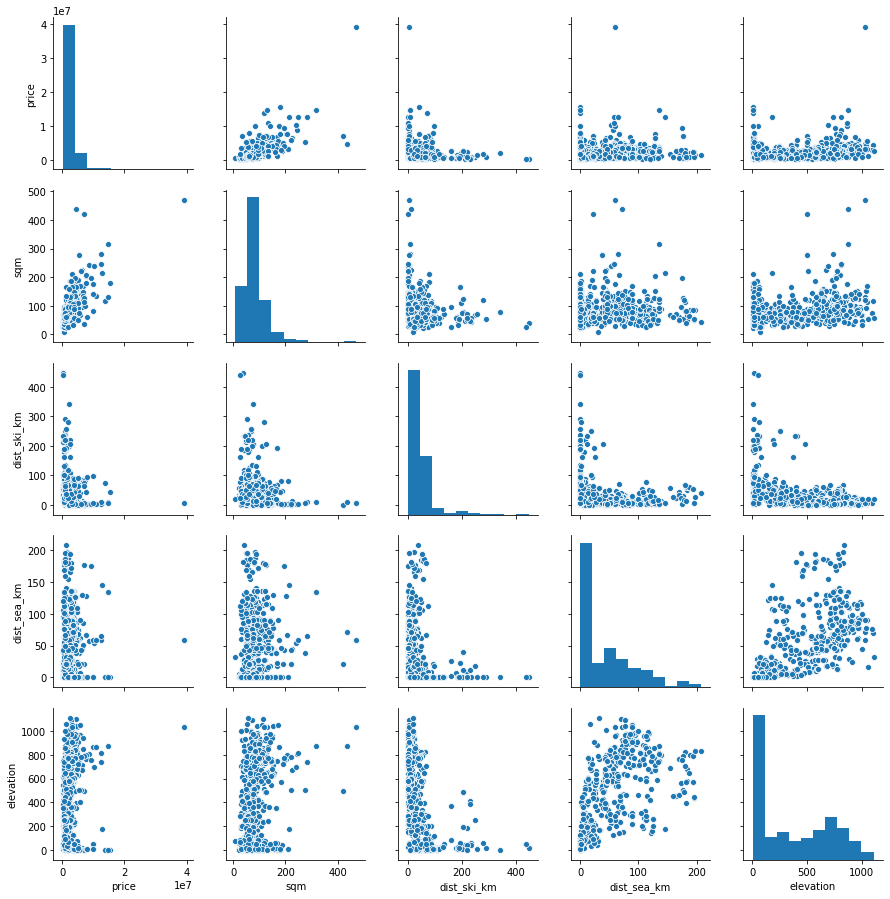

In [16]:
#C Create a pairplot with price, square meters, distance to ski resort, distance to sea and elevation

#Step 1: Getting all of the variables from the merge_2 dataset 
pair_plot = merge_2[['price','sqm','dist_ski_km','dist_sea_km','elevation']]
sns.pairplot(pair_plot)

Comment: From the pair plot above, we can conclude that square meters and price have a positive correlation. The same goes for elevation and distance to the sea. On the other hand, it can be said that there are no correlation between other plots because most of the dots are in the same area. 